In [1]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline

df=pd.read_csv('/kaggle/input/mobile-price-classification1/Mobile-data-train.csv')
df.head(5)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
tdf= df[df['sc_w'] != 0]
tdf.shape

(1820, 21)

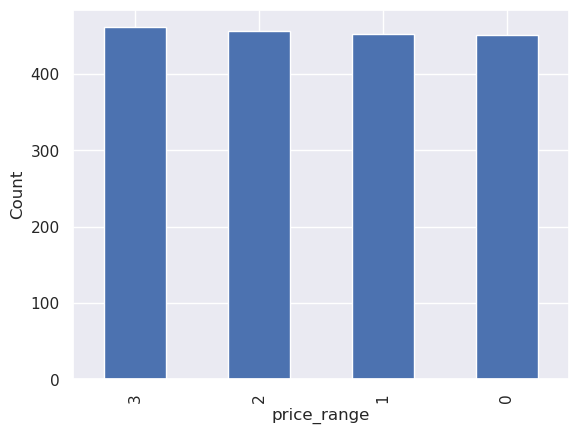

In [4]:
sns.set()
price_plot=tdf['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()


In [5]:
tdf.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)\
                          .style.background_gradient(cmap="Greens")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
ram,1820.000000,2133.372527,1087.197536,256.000000,1203.750000,2174.000000,3072.250000,3998.000000
px_height,1820.000000,646.731319,444.877537,0.000000,283.750000,561.500000,952.000000,1960.000000
battery_power,1820.000000,1237.843956,439.940961,501.000000,845.500000,1230.500000,1611.000000,1998.000000
px_width,1820.000000,1252.686264,432.342583,500.000000,877.000000,1250.000000,1633.000000,1998.000000
mobile_wt,1820.000000,140.585714,35.428886,80.000000,109.000000,141.500000,170.250000,200.000000
int_memory,1820.000000,32.139560,18.114542,2.000000,16.000000,32.000000,48.000000,64.000000
pc,1820.000000,9.882418,6.007821,0.000000,5.000000,10.000000,15.000000,20.000000
talk_time,1820.000000,11.007143,5.455951,2.000000,6.000000,11.000000,16.000000,20.000000
fc,1820.000000,4.319231,4.354894,0.000000,1.000000,3.000000,7.000000,19.000000
sc_h,1820.000000,12.485714,4.166849,5.000000,9.000000,13.000000,16.000000,19.000000


In [6]:
# Number of uniqe elements in each columns
unique = tdf.nunique()
unique.to_frame().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1052,2,26,2,20,2,63,10,121,8,...,1071,1056,1455,15,18,19,2,2,2,4


In [7]:
below= tdf["px_height"][tdf["px_height"] < 65]
n= len(below)
print("Number of values below 65 pixels in 'px_height' feature: ", n)

Number of values below 65 pixels in 'px_height' feature:  78


In [8]:
tdf.px_height.describe()

count    1820.000000
mean      646.731319
std       444.877537
min         0.000000
25%       283.750000
50%       561.500000
75%       952.000000
max      1960.000000
Name: px_height, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


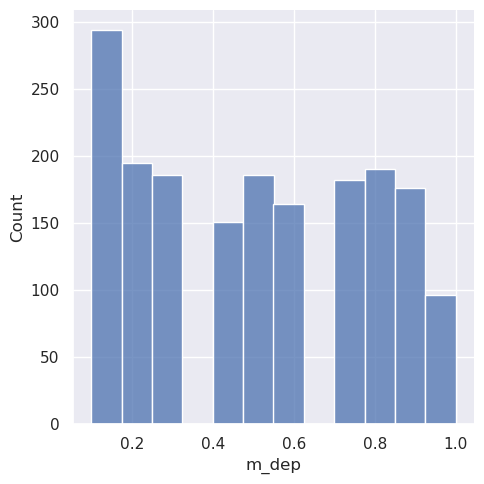

In [9]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=tdf["m_dep"])
plt.show()

In [10]:
X=tdf.drop(['price_range'], axis=1)
y=tdf['price_range']
#missing values
X.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

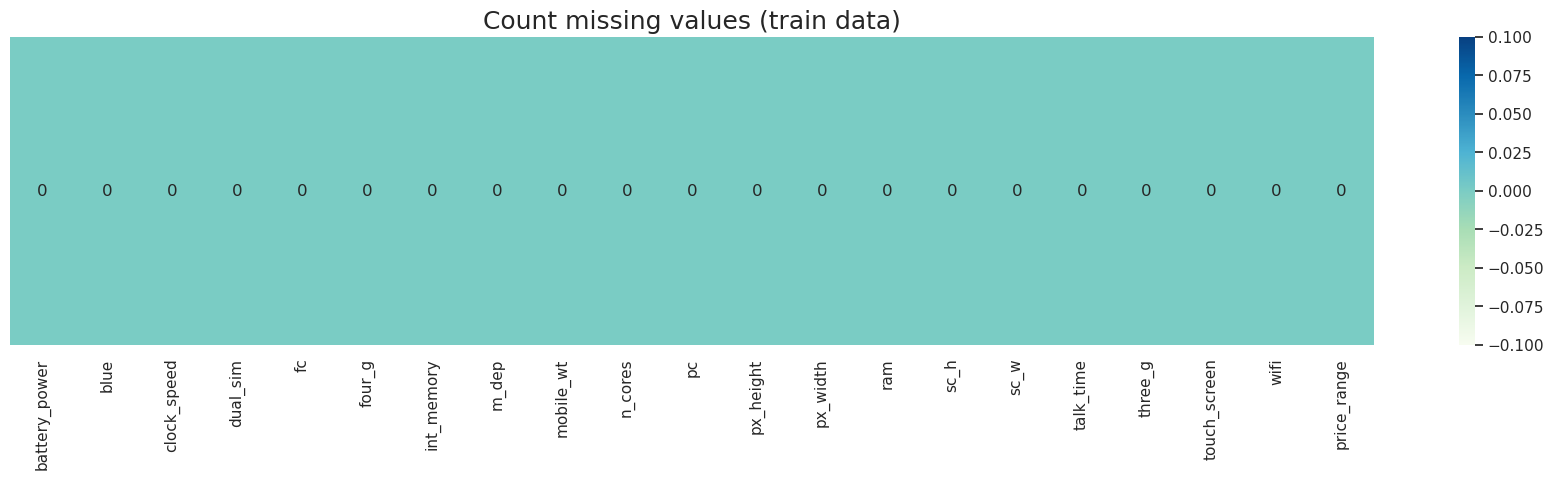

In [11]:
plt.figure(figsize=(22,4))
sns.heatmap((tdf.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (train data)', fontsize=18)
plt.show()

In [ ]:
#Exploratory Data Analysis (EDA)
T= 'price_range'
F = [col for col in tdf.columns if col not in ['tdf', T]]

cat_features = [col for col in F if tdf[col].nunique() < 25]
cont_features = [col for col in F if tdf[col].nunique() >= 25]

num_cat_features = len(cat_features)
num_cont_features = len(cont_features)

print(f"Total number of features except for the target: {len(F)}")
print(f"\033[92mNumber of categorical (<25 Unique Values) features: {num_cat_features}")
print(f"\033[96mNumber of continuous features: {num_cont_features}")

# Define labels and colors for the pie chart
labels = ['Categorical (<25 Unique Values)', 'Continuous']
colors = ['#bbddcb', '#cdddbb']

plt.pie([num_cat_features, num_cont_features], 
        labels=labels,
        colors=colors,
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Categorical and Continuous Features', fontsize=16)

# Show the plot
plt.show()

: 

In [ ]:
#check for data balance
value_counts= pd.value_counts(tdf['price_range'])

# Define the label strings using f-strings
label = [f'{"Very high" if i==0 else "High" if i==1 else "Medium" if i==2 else "Low"} cost' for i in range(len(value_counts))]

# Define the colors for each pie slice
colors = ['#4d9b68', '#538e8a', '#468e71', '#59ae8c']

# Create a pie chart with percentage values formatted with a % sign and explode the slices
fig, ax = plt.subplots()
ax.pie(value_counts.values, autopct='%0.1f%%', explode=[0.1, 0.1, 0.1, 0.1], shadow=True, labels=label, colors=colors)

# Set the title of the pie chart
ax.set_title('Balanced or Imbalanced?')

# Show the pie chart
plt.show()

In [ ]:
#building random forest model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [ ]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)


In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Greens')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [ ]:
#using raandom forest model to our train and test data
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

In [ ]:
# using Guassian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_valid)

In [ ]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')

In [ ]:
#using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_valid)
print('KNN Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_knn))
cm_rfc=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')

In [ ]:
#using SVM classifier
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_valid)
print('SVM Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_svm))
cm_rfc=my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')